In [95]:
import pandas as pd

data = pd.read_csv("[UCI] AAAI-14 Accepted Papers - Papers.csv")


# 给title加个. 分隔符
title = data["title"]
title = title.apply(lambda x: x + '.')

keywords = data["keywords"]
keywords = keywords.apply(lambda x: ". ".join(x.split("\n"))+". ")

# 
# topics = data["topics"]
# topics =  topics.apply(lambda x: ". ".join(x.split("\n"))+". " if type(x)!=float else "")

abstract = data["abstract"]

df = pd.concat([title,keywords,abstract],axis=1)
df["content"] = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)


df["content"] .to_excel("content.xlsx",index=False)


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# 转换为向量
vectorizer = TfidfVectorizer(stop_words="english",max_features=1000)
X = vectorizer.fit_transform(df["content"] )



In [97]:
from sklearn.decomposition import PCA

pca = PCA()
#X.toarray()：假设 X 是一个稀疏矩阵或稀疏数据表示的文本数据。通过 toarray() 方法将其转换为稠密矩阵，以便进行 PCA 分析。
pca.fit_transform(X.toarray())

# 特征向量 pca.explained_variance_ratio_
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 计算前几个特征向量的和，比如第二个数据就是前两个特征向量的和
# 计算最少多少个特征向量可以表示80%的数据
num_components = np.where(cumulative_variance>0.8)[0][0]+1

print(num_components)


195


In [98]:
pca1 = PCA(n_components=0.95)
#X.toarray()：假设 X 是一个稀疏矩阵或稀疏数据表示的文本数据。通过 toarray() 方法将其转换为稠密矩阵，以便进行 PCA 分析。
pca_data = pca1.fit_transform(X.toarray())
pca_data.shape

(398, 305)

c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

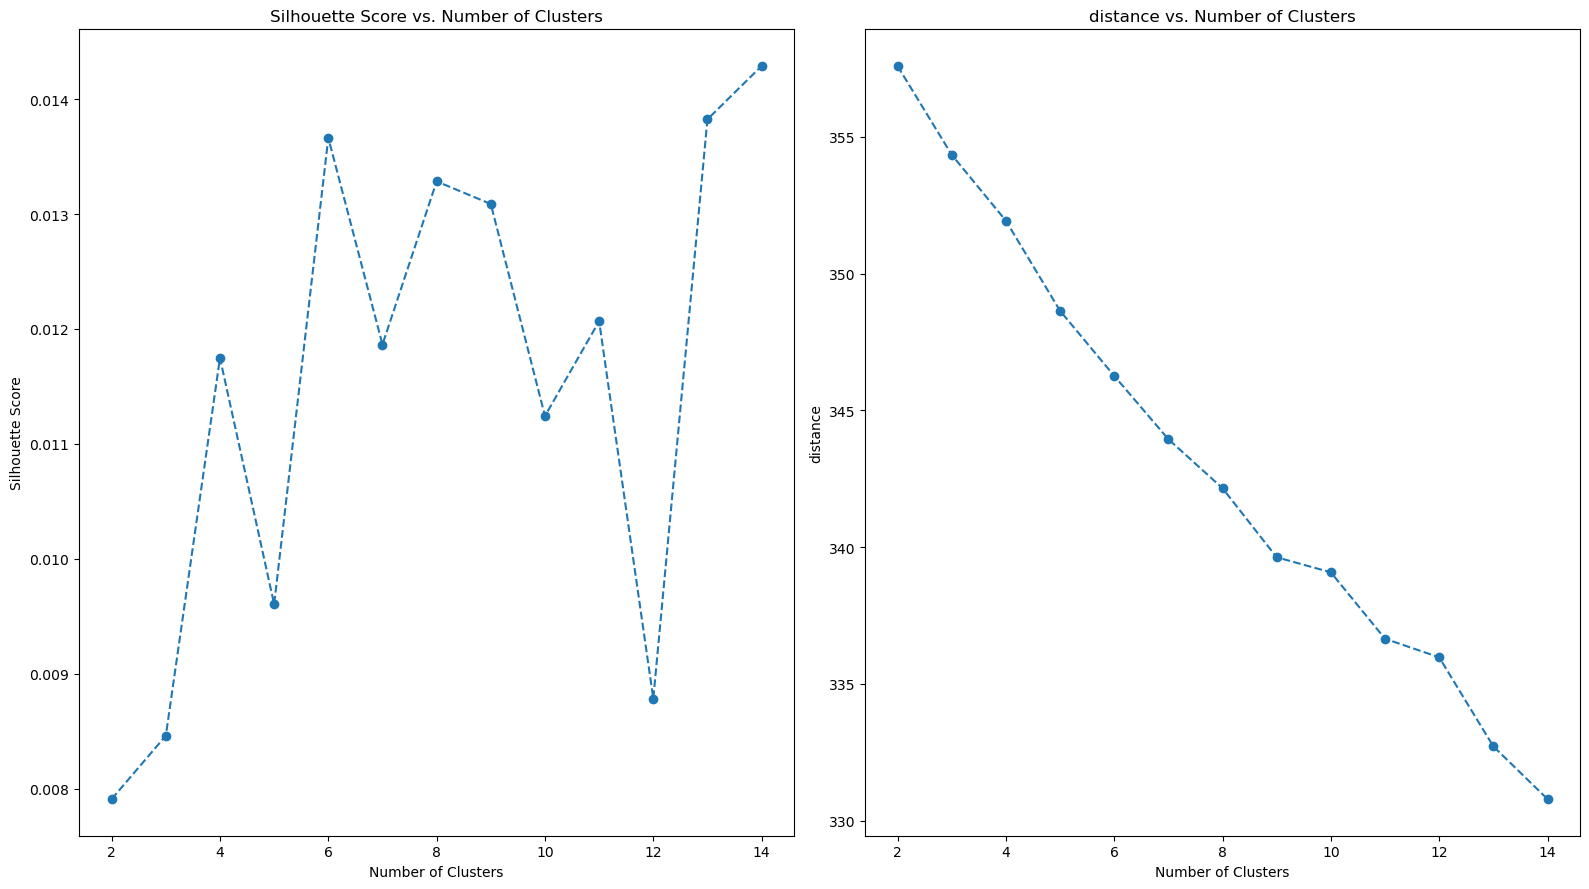

In [99]:

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

score = []
distance = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42,n_init=10,max_iter=300)
    kmeans.fit(pca_data)
    score.append(silhouette_score(pca_data,kmeans.labels_))
    distance.append(kmeans.inertia_)

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,9))

axs[0].set_title('Silhouette Score vs. Number of Clusters')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Silhouette Score')
axs[0].plot(range(2,15),score,marker="o",linestyle="--")

axs[1].set_title('distance vs. Number of Clusters')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('distance')
axs[1].plot(range(2,15),distance,marker="o",linestyle="--")
plt.tight_layout()
plt.savefig("output_plot/score.png")
plt.show()

c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

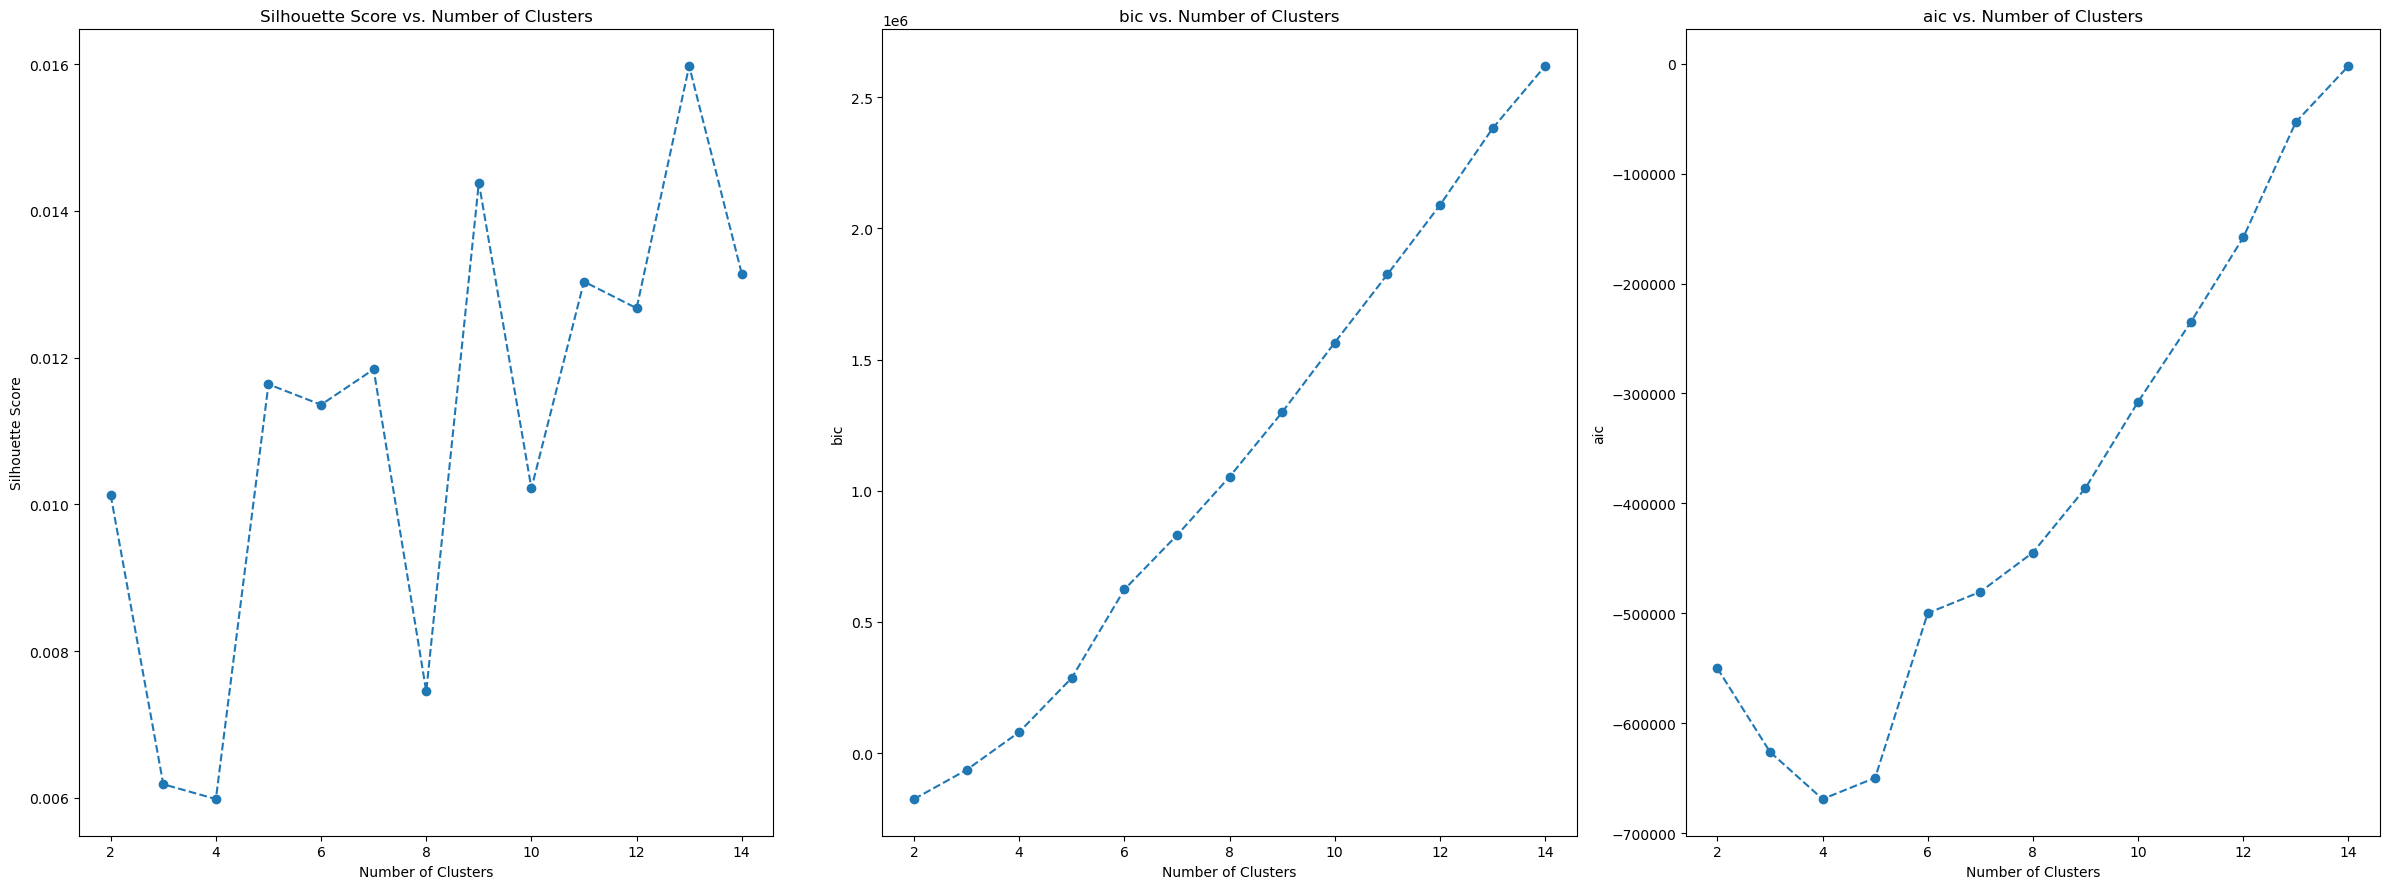

In [101]:
from sklearn.mixture import GaussianMixture

gmm_score = []
bic = []
aic = []
for i in range(2,15):
    gmm = GaussianMixture(n_components=i, covariance_type='full').fit(pca_data)
    labels = gmm.predict(pca_data)
    gmm_score.append( silhouette_score(pca_data, labels))
    bic.append(gmm.bic(pca_data))
    aic.append(gmm.aic(pca_data))

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(24,9))

axs[0].set_title('Silhouette Score vs. Number of Clusters')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Silhouette Score')
axs[0].plot(range(2,15),gmm_score,marker="o",linestyle="--")

axs[1].set_title('bic vs. Number of Clusters')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('bic')
axs[1].plot(range(2,15),bic,marker="o",linestyle="--")

axs[2].set_title('aic vs. Number of Clusters')
axs[2].set_xlabel('Number of Clusters')
axs[2].set_ylabel('aic')
axs[2].plot(range(2,15),aic,marker="o",linestyle="--")

plt.tight_layout()
plt.savefig("output_plot/gmm_score.png")
plt.show()

c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


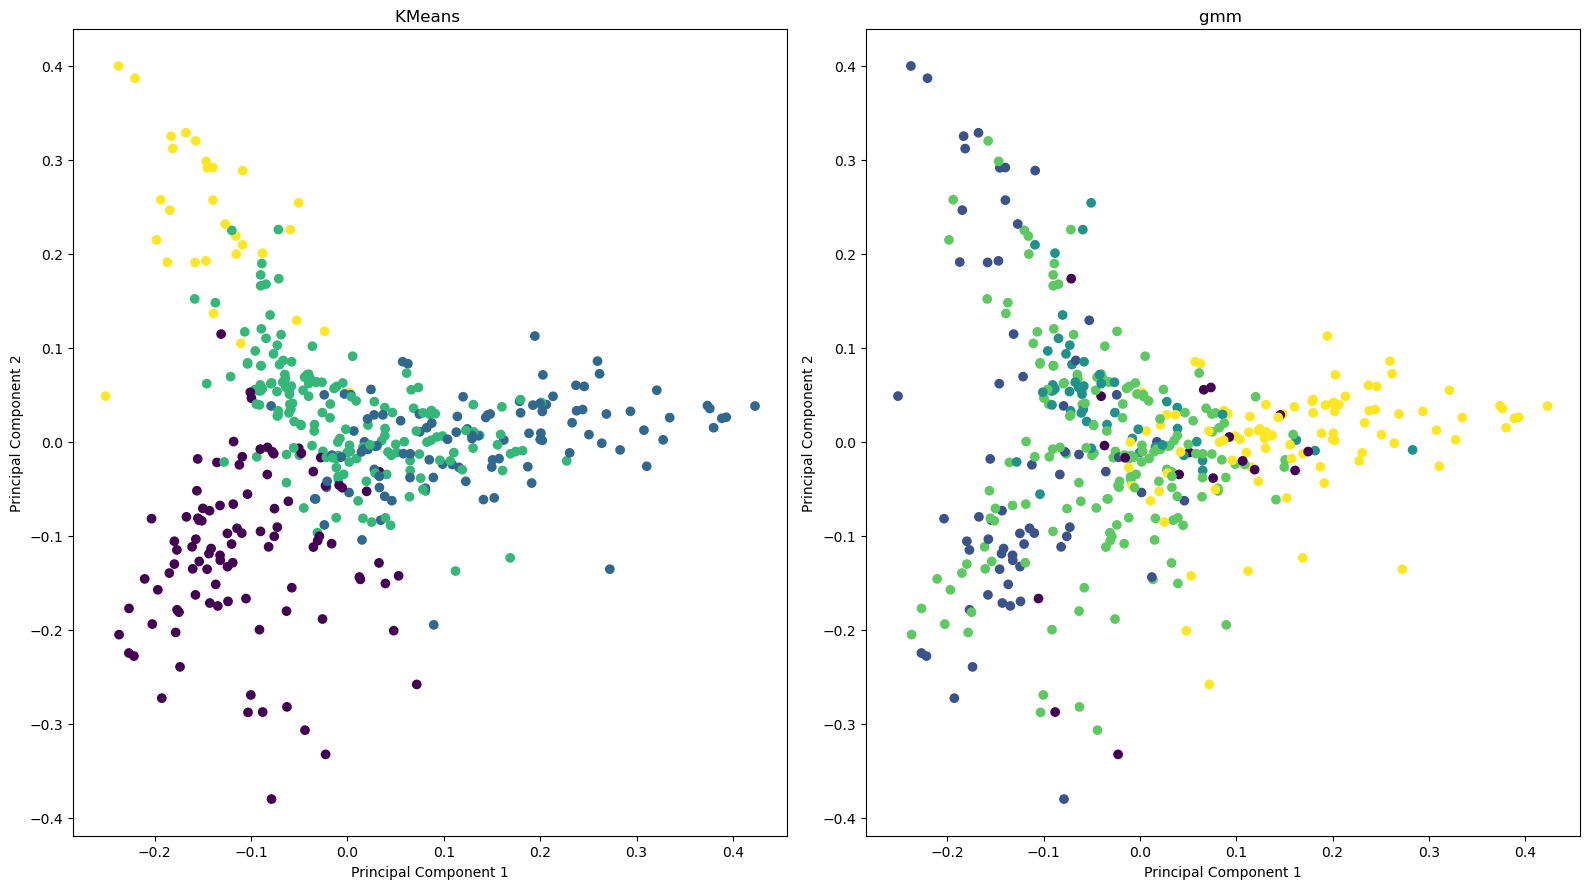

In [104]:
import seaborn as sns
kmeans = KMeans(n_clusters=4,n_init=10).fit(pca_data)
gmm = GaussianMixture(n_components=5, covariance_type='full').fit(pca_data)

kmeans_clusters = kmeans.labels_
gmm_clusters = gmm.predict(pca_data)

#分别在二维和三维进行可视化  因为300多维肯定没法可视化啊
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)
pca2_data = pca2.fit_transform(X.toarray())
pca3_data = pca3.fit_transform(X.toarray())

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,9))

axs[0].scatter(pca2_data[:, 0], pca2_data[:, 1], c=kmeans_clusters)
axs[0].set_title('KMeans ')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')


axs[1].scatter(pca2_data[:, 0], pca2_data[:, 1], c=gmm_clusters)
axs[1].set_title('gmm ')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.savefig("output_plot/pca_2d.png")
plt.show()


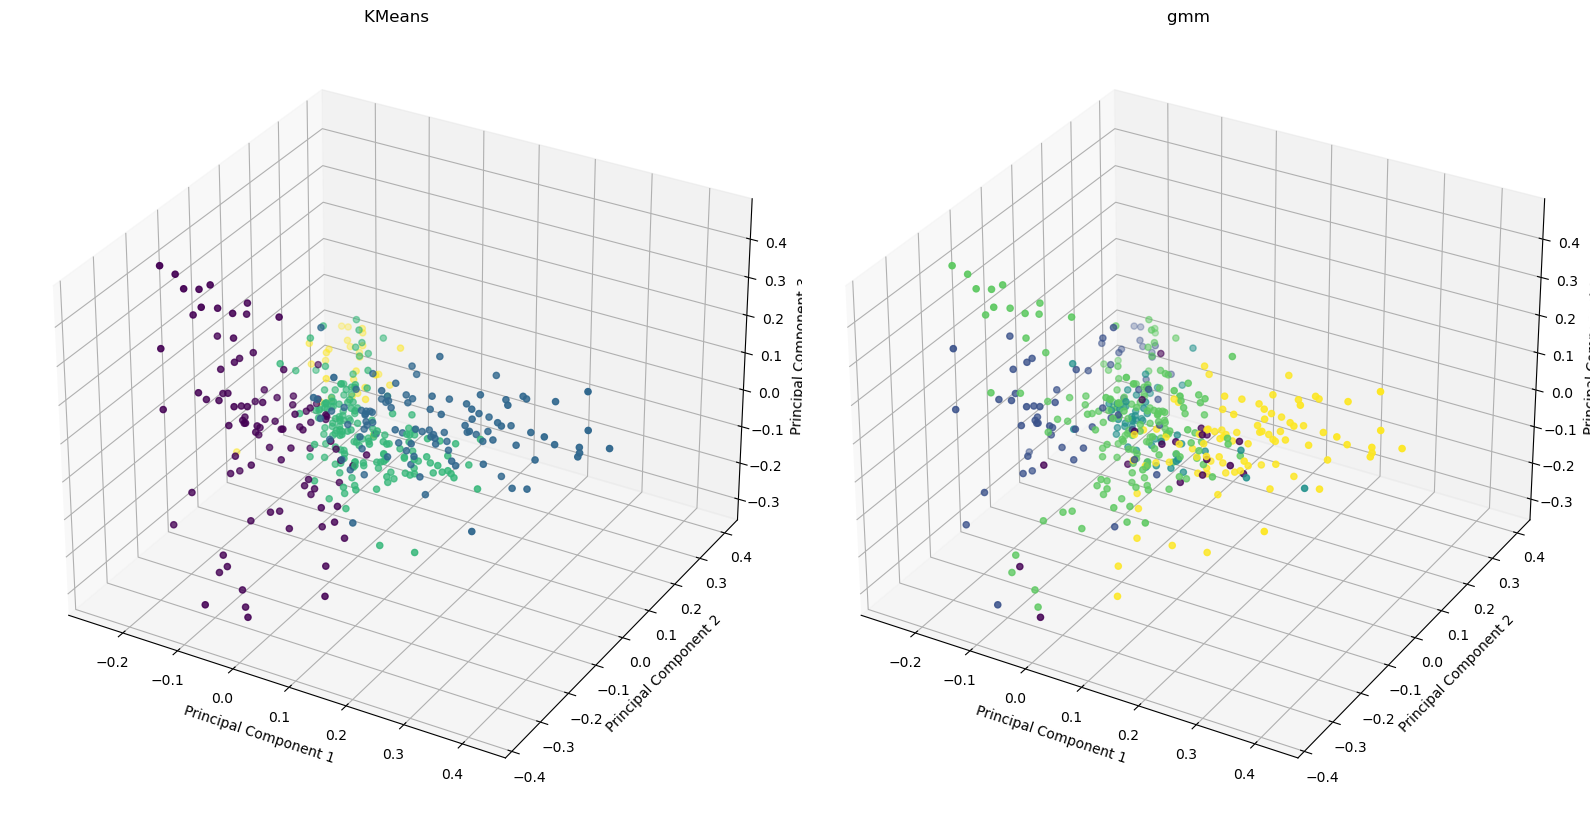

In [105]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,9),subplot_kw={'projection': '3d'})


axs[0].scatter(pca3_data[:, 0], pca3_data[:, 1],pca3_data[:, 2], c=kmeans_clusters)
axs[0].set_title('KMeans ')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].set_zlabel('Principal Component 3')

axs[1].scatter(pca3_data[:, 0], pca3_data[:, 1],pca3_data[:, 2], c=gmm_clusters)
axs[1].set_title('gmm ')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_zlabel('Principal Component 3')

plt.tight_layout()
plt.savefig("output_plot/pca_3d.png")
plt.show()

In [108]:
from sklearn.manifold import TSNE

tsne_data = TSNE(
    n_components=3,   
    random_state=42,
    n_jobs=2
).fit_transform(X.toarray())

tsne_data.shape



(398, 3)

c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

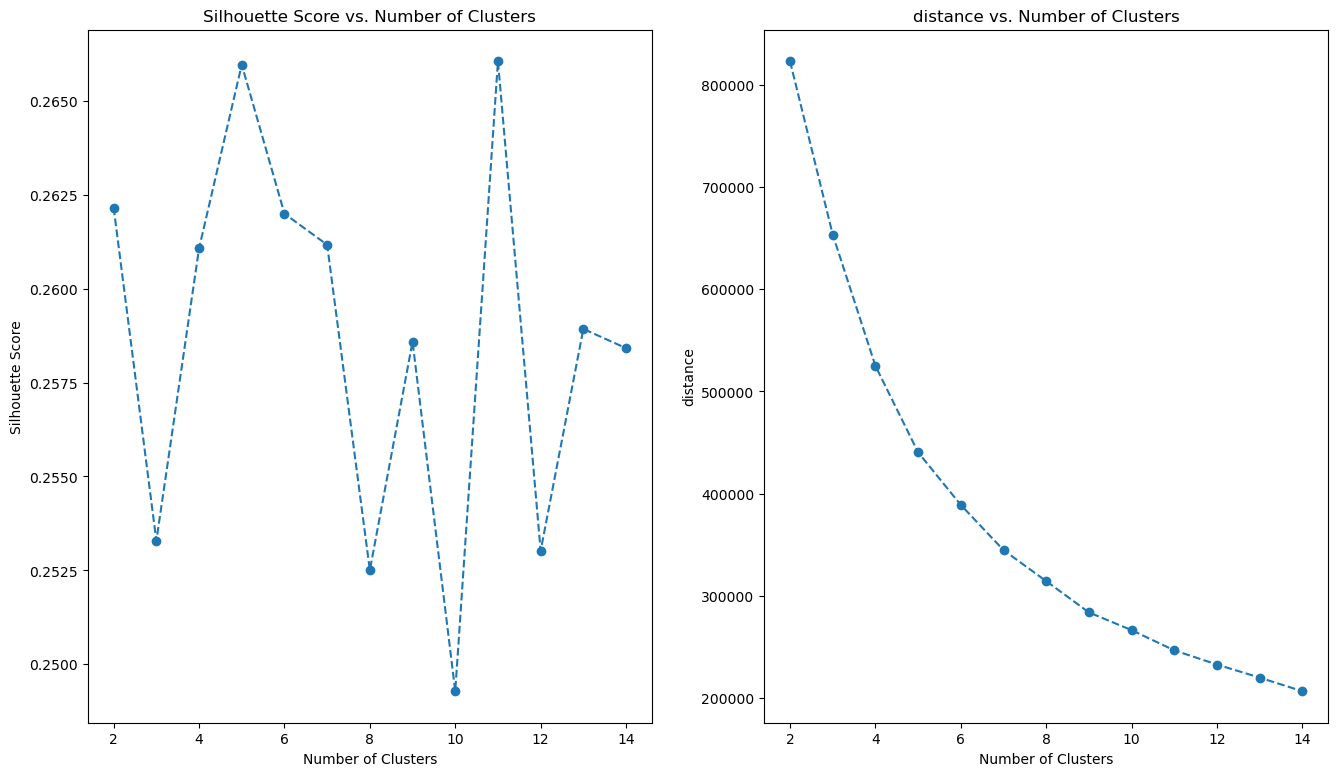

In [109]:

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

score = []
distance = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42,n_init=10,max_iter=300)
    kmeans.fit(tsne_data)
    score.append(silhouette_score(tsne_data,kmeans.labels_))
    distance.append(kmeans.inertia_)

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,9))

axs[0].set_title('Silhouette Score vs. Number of Clusters')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Silhouette Score')
axs[0].plot(range(2,15),score,marker="o",linestyle="--")

axs[1].set_title('distance vs. Number of Clusters')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('distance')
axs[1].plot(range(2,15),distance,marker="o",linestyle="--")

plt.show()

c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

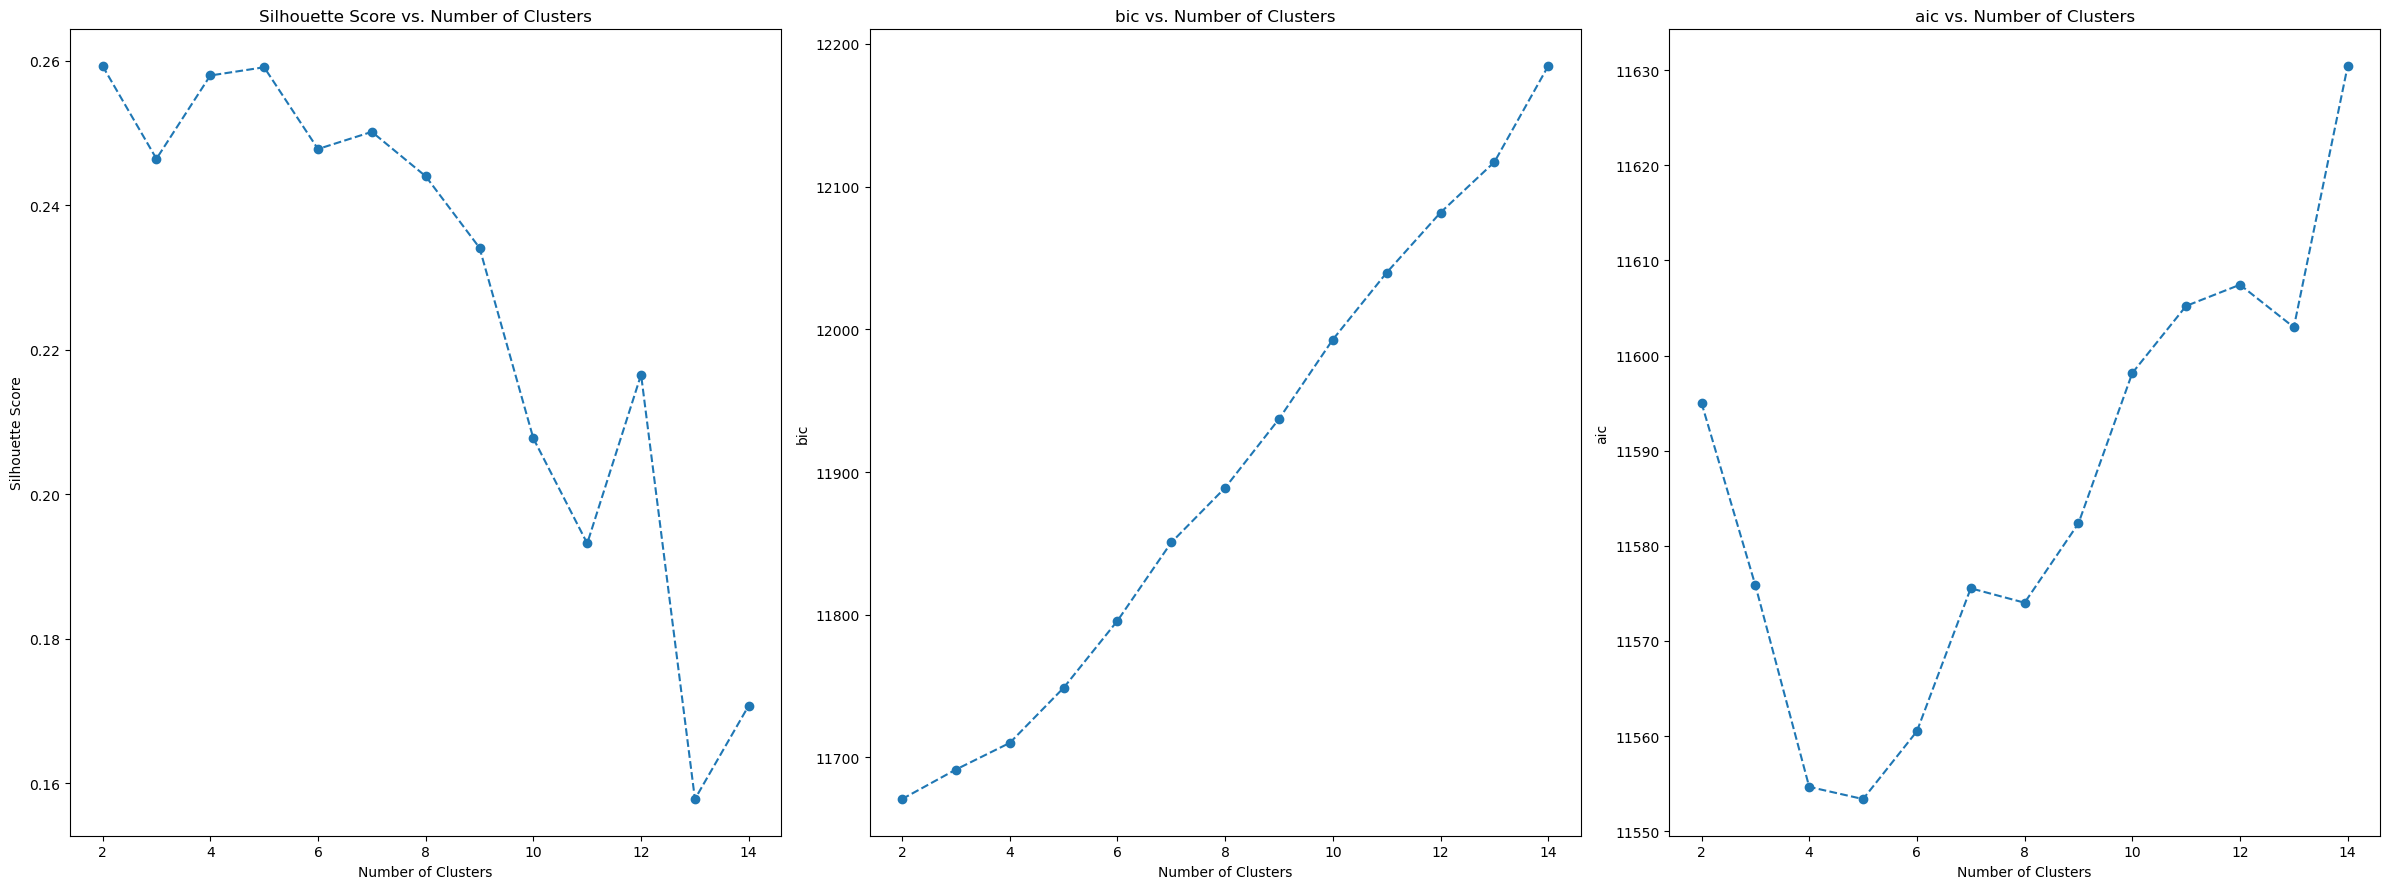

In [110]:
from sklearn.mixture import GaussianMixture

gmm_score = []
bic = []
aic = []
for i in range(2,15):
    gmm = GaussianMixture(n_components=i, covariance_type='full').fit(tsne_data)
    labels = gmm.predict(tsne_data)
    gmm_score.append( silhouette_score(tsne_data, labels))
    bic.append(gmm.bic(tsne_data))
    aic.append(gmm.aic(tsne_data))

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(24,9))

axs[0].set_title('Silhouette Score vs. Number of Clusters')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Silhouette Score')
axs[0].plot(range(2,15),gmm_score,marker="o",linestyle="--")

axs[1].set_title('bic vs. Number of Clusters')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('bic')
axs[1].plot(range(2,15),bic,marker="o",linestyle="--")

axs[2].set_title('aic vs. Number of Clusters')
axs[2].set_xlabel('Number of Clusters')
axs[2].set_ylabel('aic')
axs[2].plot(range(2,15),aic,marker="o",linestyle="--")

plt.tight_layout()
plt.savefig("output_plot/gmm_score_tsne.png")
plt.show()

In [114]:
from sklearn.manifold import TSNE

tsne_data2 = TSNE(
    n_components=2,   
    random_state=42,
    n_jobs=2
).fit_transform(X.toarray())

tsne_data2.shape

(398, 2)

c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

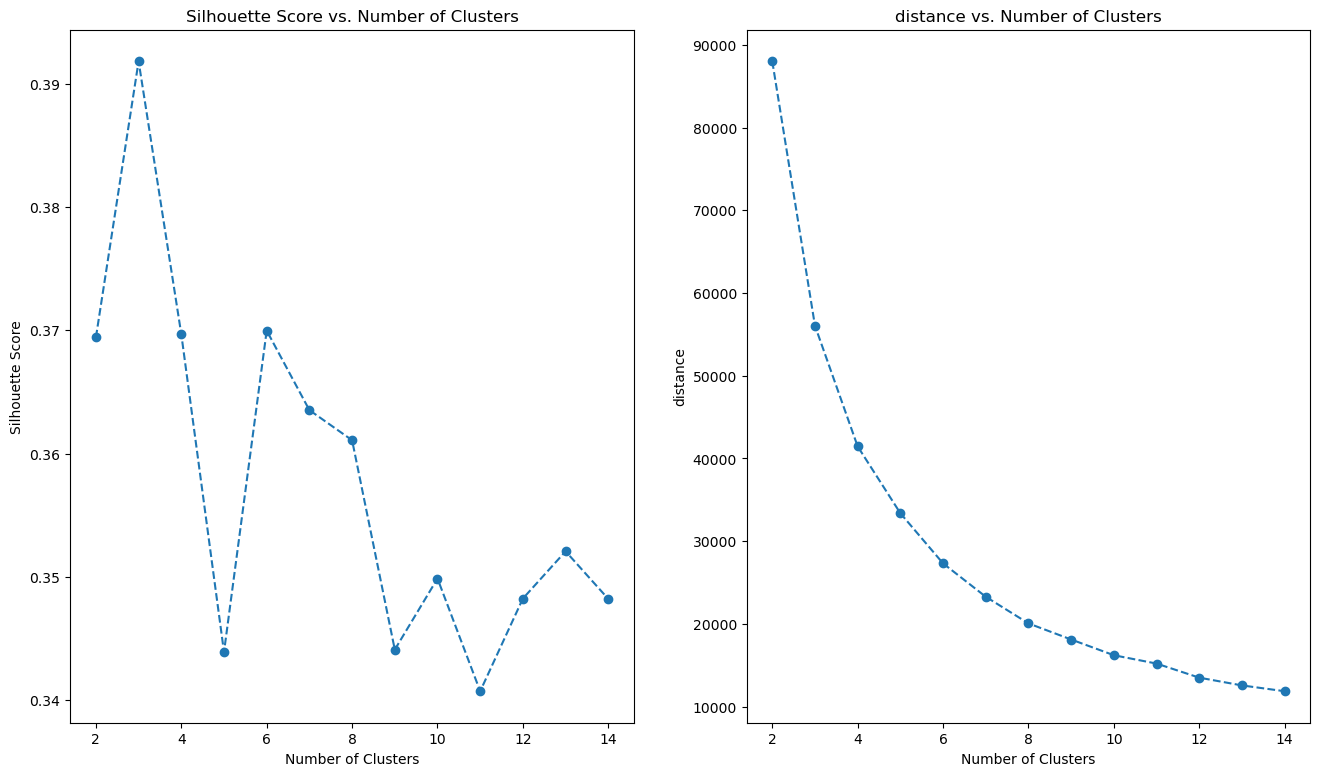

In [115]:

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

score = []
distance = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42,n_init=10,max_iter=300)
    kmeans.fit(tsne_data2)
    score.append(silhouette_score(tsne_data2,kmeans.labels_))
    distance.append(kmeans.inertia_)

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,9))

axs[0].set_title('Silhouette Score vs. Number of Clusters')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Silhouette Score')
axs[0].plot(range(2,15),score,marker="o",linestyle="--")

axs[1].set_title('distance vs. Number of Clusters')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('distance')
axs[1].plot(range(2,15),distance,marker="o",linestyle="--")

plt.show()

c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

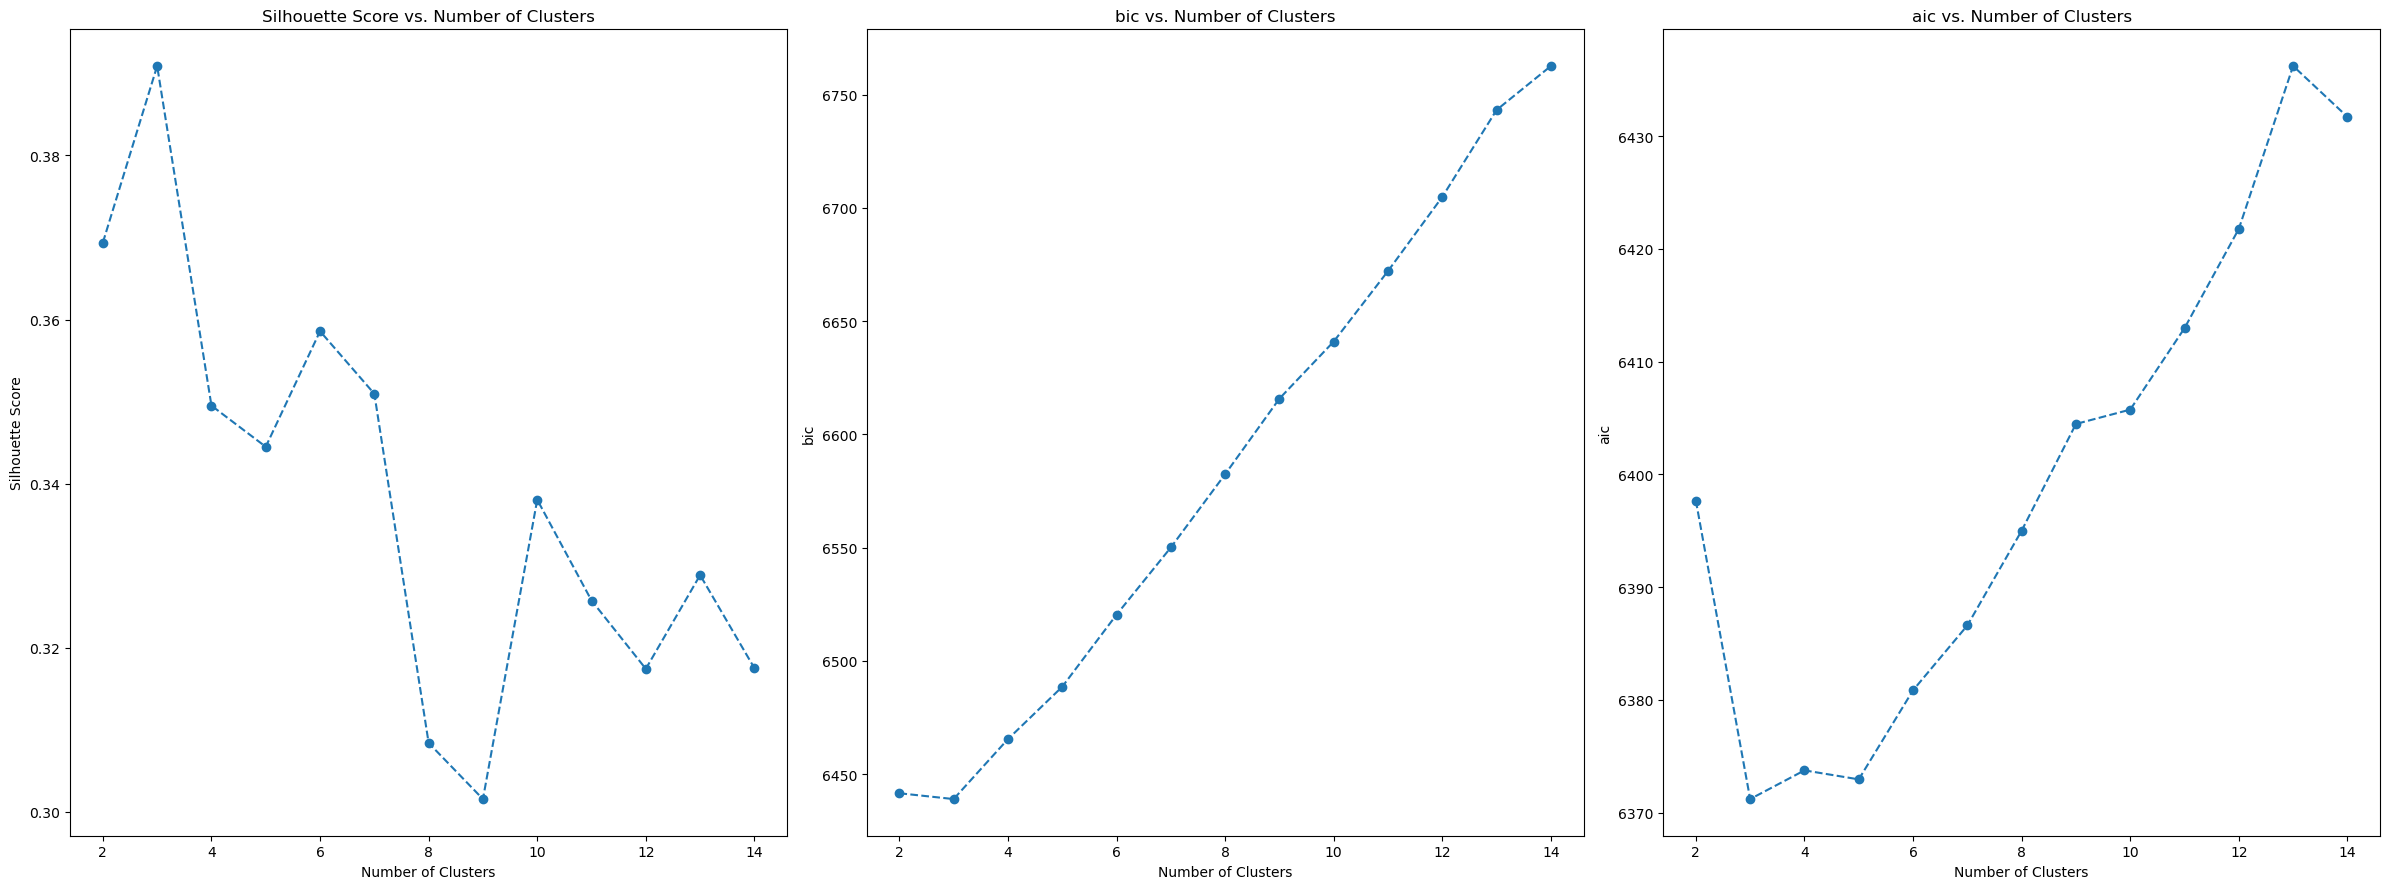

In [116]:
from sklearn.mixture import GaussianMixture

gmm_score = []
bic = []
aic = []
for i in range(2,15):
    gmm = GaussianMixture(n_components=i, covariance_type='full').fit(tsne_data2)
    labels = gmm.predict(tsne_data2)
    gmm_score.append( silhouette_score(tsne_data2, labels))
    bic.append(gmm.bic(tsne_data2))
    aic.append(gmm.aic(tsne_data2))

fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(24,9))

axs[0].set_title('Silhouette Score vs. Number of Clusters')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Silhouette Score')
axs[0].plot(range(2,15),gmm_score,marker="o",linestyle="--")

axs[1].set_title('bic vs. Number of Clusters')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('bic')
axs[1].plot(range(2,15),bic,marker="o",linestyle="--")

axs[2].set_title('aic vs. Number of Clusters')
axs[2].set_xlabel('Number of Clusters')
axs[2].set_ylabel('aic')
axs[2].plot(range(2,15),aic,marker="o",linestyle="--")

plt.tight_layout()
plt.savefig("output_plot/gmm_score_tsne2.png")
plt.show()

c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


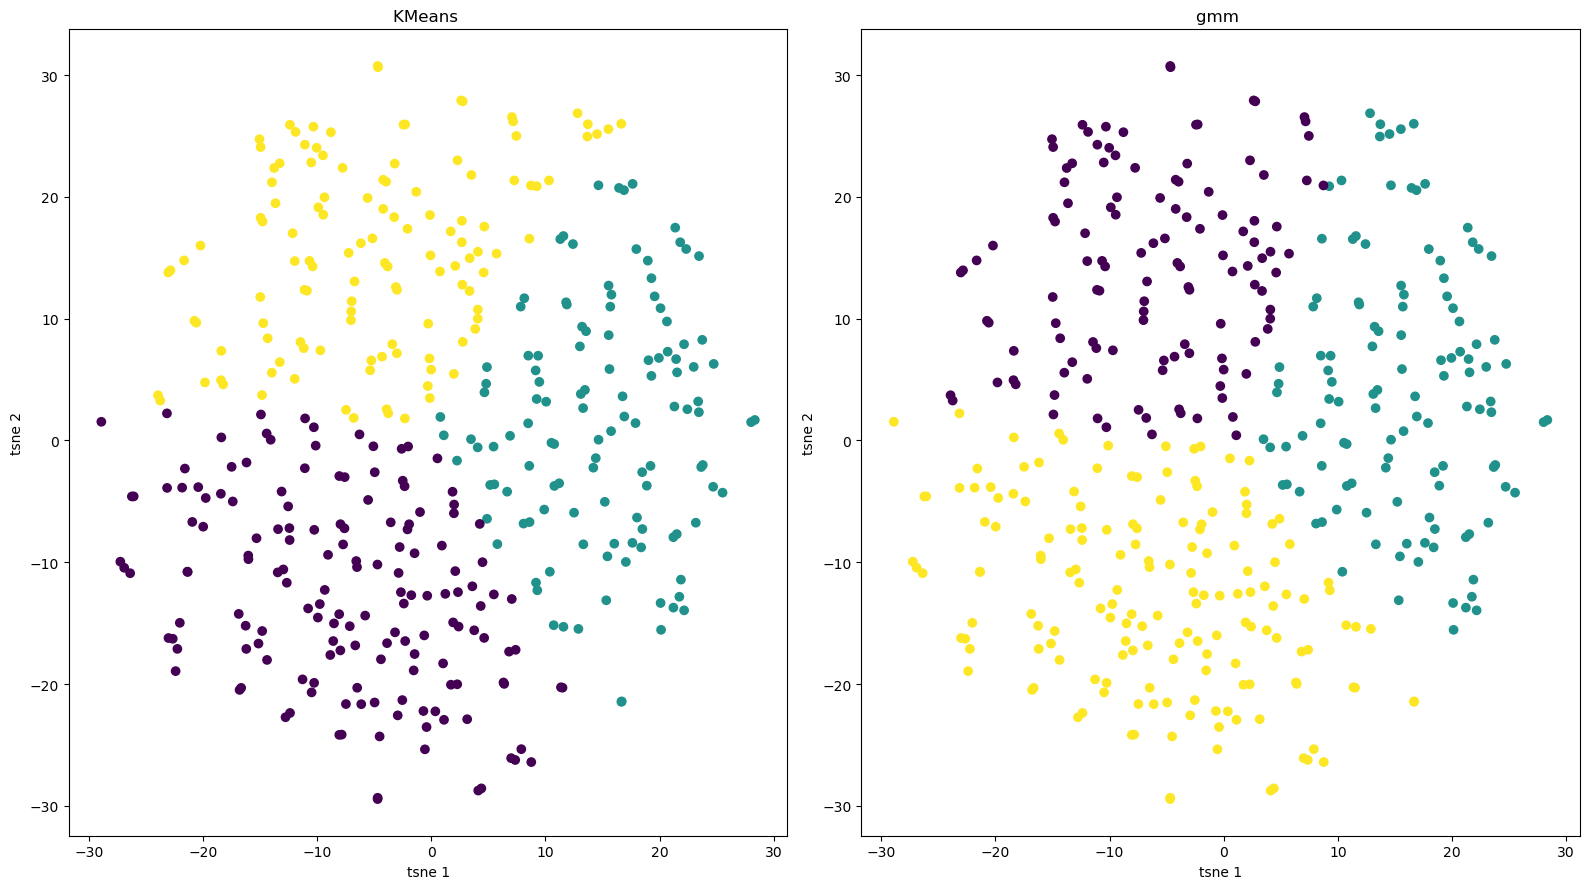

In [118]:

kmeans = KMeans(n_clusters=3,n_init=10).fit(tsne_data2)
gmm = GaussianMixture(n_components=3, covariance_type='full').fit(tsne_data2)

kmeans_clusters = kmeans.labels_
gmm_clusters = gmm.predict(tsne_data2)


fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,9))


axs[0].scatter(tsne_data2[:, 0], tsne_data2[:, 1], c=kmeans_clusters)
axs[0].set_title('KMeans ')
axs[0].set_xlabel('tsne 1')
axs[0].set_ylabel('tsne 2')


axs[1].scatter(tsne_data2[:, 0], tsne_data2[:, 1], c=gmm_clusters)
axs[1].set_title('gmm ')
axs[1].set_xlabel('tsne 1')
axs[1].set_ylabel('tsne 2')


plt.tight_layout()
plt.savefig("output_plot/tsne_2d.png")
plt.show()

c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


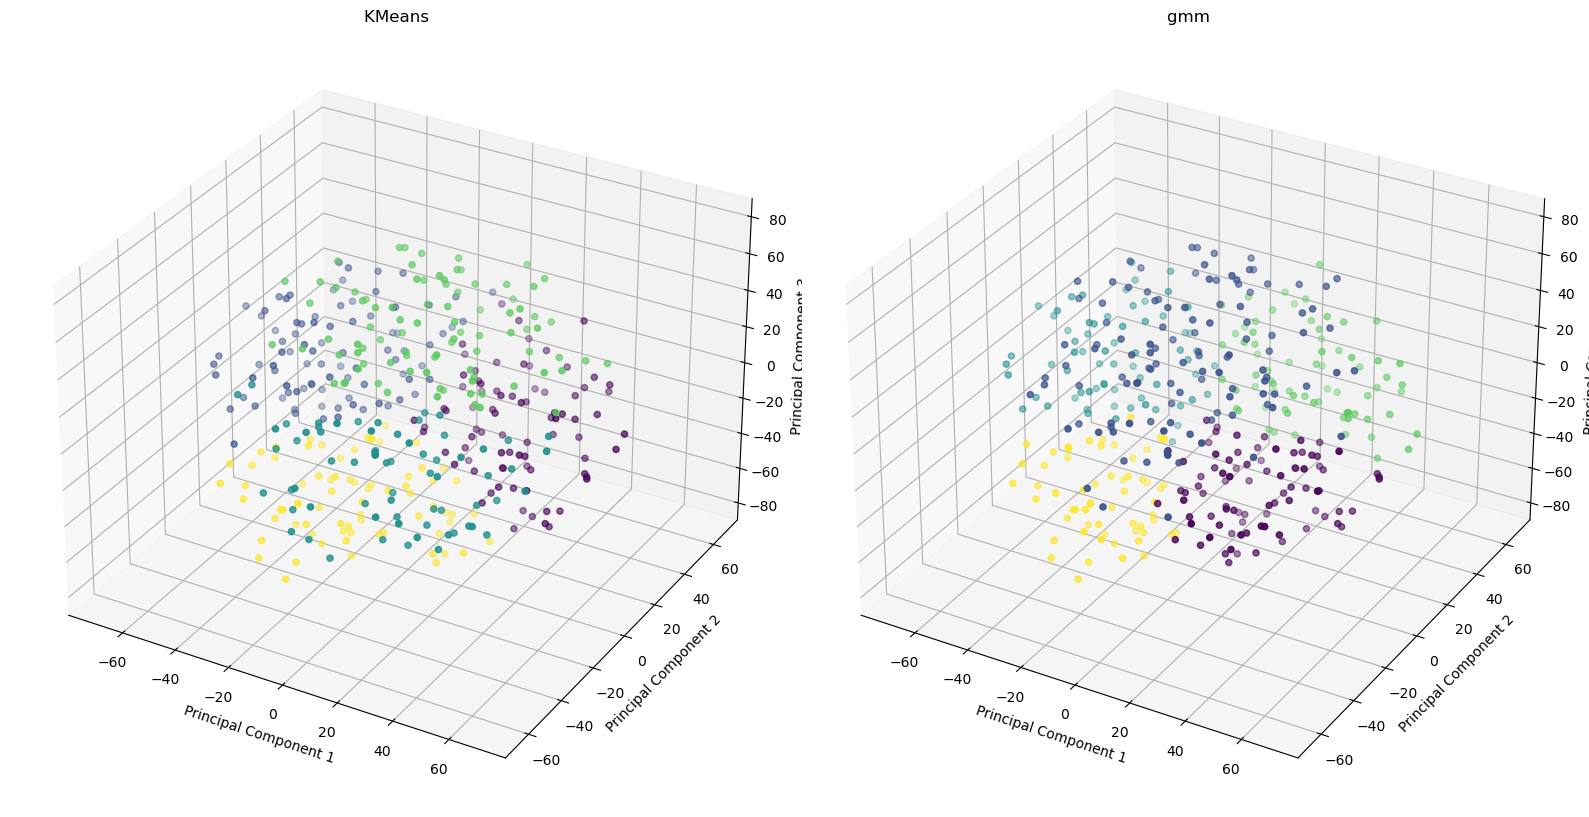

In [111]:
import seaborn as sns
kmeans = KMeans(n_clusters=5,n_init=10).fit(tsne_data)
gmm = GaussianMixture(n_components=5, covariance_type='full').fit(tsne_data)

kmeans_clusters = kmeans.labels_
gmm_clusters = gmm.predict(tsne_data)


fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,9),subplot_kw={'projection': '3d'})


axs[0].scatter(tsne_data[:, 0], tsne_data[:, 1],tsne_data[:, 2], c=kmeans_clusters)
axs[0].set_title('KMeans ')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].set_zlabel('Principal Component 3')

axs[1].scatter(tsne_data[:, 0], tsne_data[:, 1],tsne_data[:, 2], c=gmm_clusters)
axs[1].set_title('gmm ')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].set_zlabel('Principal Component 3')

plt.tight_layout()
plt.savefig("output_plot/tsne_3d.png")
plt.show()

In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer


def find_top10words(documents):
    # 假设文档存储在一个列表中，每个元素表示一个文档
    documents = documents

    # 创建TF-IDF向量化器
    vectorizer = TfidfVectorizer(stop_words="english")

    # 对文档进行向量化
    tfidf_matrix = vectorizer.fit_transform(documents)

    # 获取所有词的列表
    words = vectorizer.get_feature_names_out()

    # 计算每个词的平均TF-IDF值
    avg_tfidf = tfidf_matrix.mean(axis=0).tolist()[0]

    # 按照TF-IDF值对词进行排序
    sorted_words = sorted(zip(words, avg_tfidf), key=lambda x: x[1], reverse=True)

    # 获取频率最高的10个词
    top_words = sorted_words[:10]
    return top_words

In [224]:
# 获得pca0.95-kmeans-4类
kmeans = KMeans(n_clusters=4,n_init=10).fit(pca_data)
kmeans_labels = kmeans.labels_
kmeans_labels = pd.Series(kmeans_labels)
# 获得tsne2-kmeans-3类
kmeans2 = KMeans(n_clusters=3,n_init=10).fit(tsne_data2)
kmeans2_labels = kmeans2.labels_
kmeans2_labels = pd.Series(kmeans2_labels)
# 制造两个content 里面存储内容和标签
content = pd.read_excel("content.xlsx")
content1 = pd.concat([content,kmeans_labels],axis=1)
content2 = pd.concat([content,kmeans2_labels],axis=1)


# pca的documents
p_documents0 = content1[content1.iloc[:, 1] == 0].iloc[:,0].values
p_documents1 = content1[content1.iloc[:, 1] == 1].iloc[:,0].values
p_documents2 = content1[content1.iloc[:, 1] == 2].iloc[:,0].values
p_documents3 = content1[content1.iloc[:, 1] == 3].iloc[:,0].values

# tsne的documents
k_documents0 = content2[content2.iloc[:, 1] == 0].iloc[:,0].values
k_documents1 = content2[content2.iloc[:, 1] == 1].iloc[:,0].values
k_documents2 = content2[content2.iloc[:, 1] == 2].iloc[:,0].values



c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Guoxn\.conda\envs\pytouch_11.6\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [225]:
pdoc0_top10 =  find_top10words(p_documents0)
pdoc1_top10 =  find_top10words(p_documents1)
pdoc2_top10 =  find_top10words(p_documents2)
pdoc3_top10 =  find_top10words(p_documents3)



kdoc0_top10 =  find_top10words(k_documents0)
kdoc1_top10 =  find_top10words(k_documents1)
kdoc2_top10 =  find_top10words(k_documents2)


print(" ---------------------------------------------------")
print(pdoc0_top10)
print(" ---------------------------------------------------")
print(pdoc1_top10)
print(" ---------------------------------------------------")
print(pdoc2_top10)
print(" ---------------------------------------------------")
print(pdoc3_top10)
print(" ---------------------------------------------------")
print(kdoc0_top10)
print(" ---------------------------------------------------")
print(kdoc1_top10)
print(" ---------------------------------------------------")
print(kdoc2_top10)



 ---------------------------------------------------
[('model', 0.0312970179018108), ('learning', 0.02358092602722818), ('search', 0.02354847356471189), ('data', 0.02260826430495191), ('algorithm', 0.022304946701099244), ('based', 0.02220019249274445), ('models', 0.021010465990798245), ('problem', 0.01767478726319837), ('approach', 0.016819407053894543), ('algorithms', 0.01605314908659892)]
 ---------------------------------------------------
[('social', 0.04510211978092555), ('games', 0.04504669474440806), ('game', 0.04046895517997759), ('agents', 0.031052656587273512), ('mechanism', 0.029466847093243476), ('problem', 0.0285675171535538), ('information', 0.025741990489727164), ('equilibrium', 0.023367275174187088), ('rules', 0.022829801945930657), ('algorithm', 0.022741924594730265)]
 ---------------------------------------------------
[('planning', 0.1029602074165655), ('problems', 0.05050770024521803), ('search', 0.0415329159674629), ('model', 0.03994323451607318), ('logic', 0.03773

In [229]:
content = pd.read_excel("content.xlsx")
content3 = content
content3.loc[content3.iloc[:, 0].isin(p_documents0), "labels"] = "search learning model（搜索学习模型）"
content3.loc[content3.iloc[:, 0].isin(p_documents1), "labels"] = "the equilibrium mechanism for social games（社会游戏的均衡机制）"
content3.loc[content3.iloc[:, 0].isin(p_documents2), "labels"] = "Based on control logic and checking learning（基于控制逻辑和检查学习）"
content3.loc[content3.iloc[:, 0].isin(p_documents3), "labels"] = "multi sparse image domain classification（多稀疏图像域分类）"
content3.head()

,content,labels
0,Kernelized Bayesian Transfer Learning. cross-d...,NaN
1,"""Source Free"" Transfer Learning for Text Class...",NaN
2,A Generalization of Probabilistic Serial to Ra...,NaN
3,Lifetime Lexical Variation in Social Media. Ge...,search learning model（搜索学习模型）
4,Hybrid Singular Value Thresholding for Tensor ...,NaN
